# Desafio - Sprint 3


Caso uma célula não execute, **reinicie o notebook** e **execute as células acima** dela.

Outra opção é **executar todas as células de uma vez**.


## 1 - Carregar a Planilha

O trecho de código a seguir vai ser usado em todas as outras células. Nele, se carrega os dados e se remove as repetições dentre as linhas.



In [126]:
import pandas as pd

df = pd.read_csv('./googleplaystore.csv')

# Remover linhas duplicadas
df = df.drop_duplicates()

# Convertendo a coluna 'Last Updated' para o formato de data
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Ordenando o DataFrame pela coluna 'Last Updated' em ordem decrescente
df = df.sort_values(by='Last Updated', ascending=False)

# Removendo linhas duplicadas mantendo apenas a mais recente com base na coluna 'App'
df = df.drop_duplicates(subset='App', keep='first')

# Ver a tabela
# display(df)

## 2- Gráfico de Barras

### 5 apps com mais instalações

Obs: Nesse dataset, muitos aplicativos estavam empatados com o maior número de instalações.

Por isso, foram reorganizados e exibidos mais de 5 apps.

O critério de agrupamento foi a empresa responsável pelos apps.


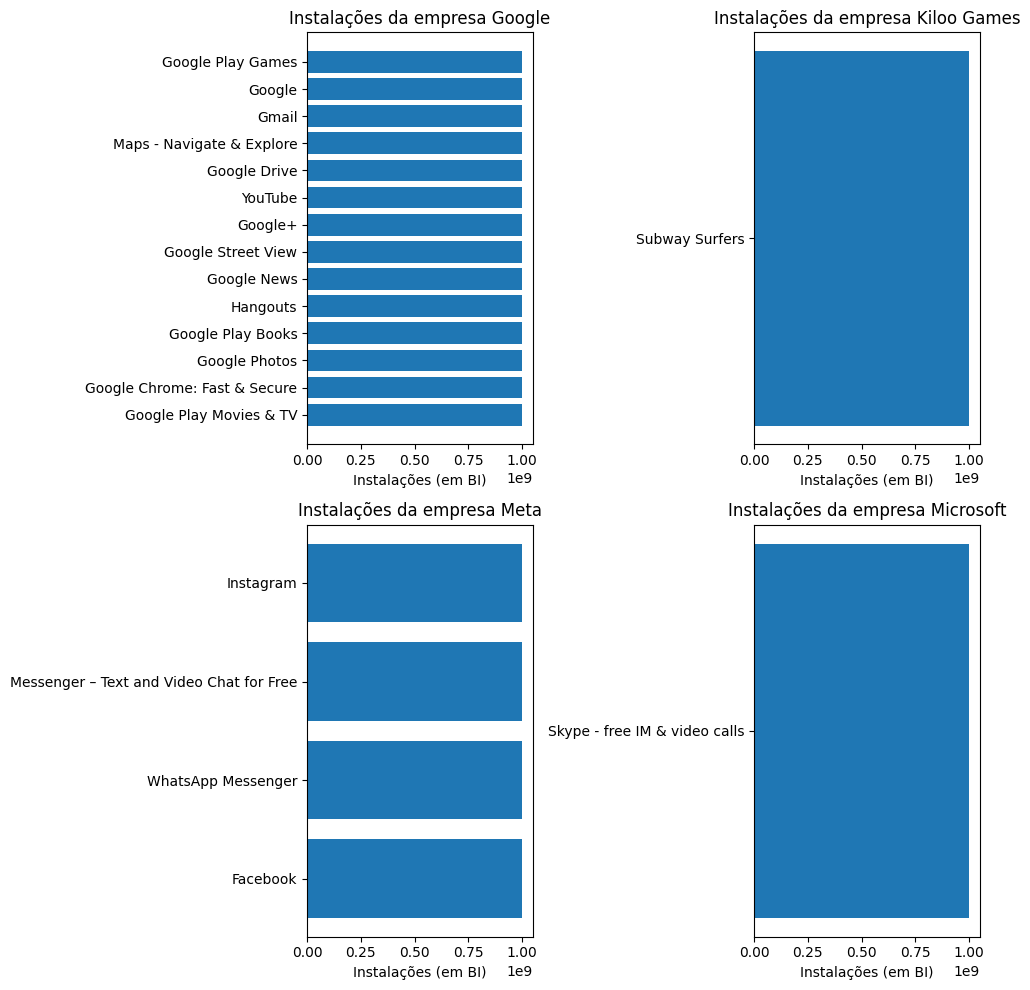

In [127]:
# Carregando a planilha ----------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./googleplaystore.csv')

# Remover linhas duplicadas
df = df.drop_duplicates()

# Convertendo a coluna 'Last Updated' para o formato de data
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Ordenando o DataFrame pela coluna 'Last Updated' em ordem decrescente
df = df.sort_values(by='Last Updated', ascending=False)

# Removendo linhas duplicadas mantendo apenas a mais recente com base na coluna 'App'
df = df.drop_duplicates(subset='App', keep='first')

#---------------------------------------------------------------

# Escolhendo colunas específicas
tabelaAppsInstalacoes = df[['App', 'Installs']].copy()

# Formatando coluna de número de instalações
tabelaAppsInstalacoes['Installs'] = tabelaAppsInstalacoes['Installs'].str.replace(
    '+', '').str.replace(',', '')

tabelaAppsInstalacoes['Installs'] = pd.to_numeric(
    tabelaAppsInstalacoes['Installs'], errors='coerce')


# Ordenando pelos aplicativos com mais instalações
tabelaAppsInstalacoes = tabelaAppsInstalacoes.sort_values(
    by='Installs', ascending=False)

# Selecionando os aplicativos com mais instalações
topApps = tabelaAppsInstalacoes[tabelaAppsInstalacoes['Installs'] == max(
    tabelaAppsInstalacoes['Installs'])].copy()

# -------------------------------------------------------------------------

# Nesta dataset, 20 apps possuem o maior valor (1 BI de Downloads)
# Por isso, agrupei as colunas pela empresa que é dona dos apps

def determinarEmpresa(app):
    nomeApp = app.lower()
    empresas = {
        'Google': ['google', 'gmail', 'hangouts', 'maps', 'youtube'],
        'Meta': ['whatsapp', 'facebook', 'instagram', 'messenger'],
        'Microsoft': ['skype'],
        'Kiloo Games': ['subway surfers']
    }

    for empresa, keywords in empresas.items():
        if any(keyword in nomeApp for keyword in keywords):
            return empresa

    return 'Outros'


# Criar uma coluna com o nome da empresa
topApps['Company'] = topApps['App'].apply(determinarEmpresa)


# Criando gráfico --------------------------------------------------------

appsPorEmpresa = {empresa: grupo for empresa, grupo in topApps.groupby('Company')}
numEmpresas = len(appsPorEmpresa)

# Criar a figura e os eixos
num_linhas = (numEmpresas + 1) // 2  # Divisão arredondada para cima
num_colunas = 2
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, num_linhas * 5))

# Plotar cada dataframe em um subplot
'''
Layout:
Sempre 2 colunas
Linhas variáveis (dependa da quantidade de empresas)

 =========================
 | Empresa 1 | Empresa 2 |
 |-----      |--------   |
 |---        |-------    | 
 |------     |----       |
 | Empresa 3 | Empresa 4 |
 |           |-------    |
 |--------   |-----      | 
 |           |----       |
 =========================
 


'''
for i, (empresa, df) in enumerate(appsPorEmpresa.items()):
    linha = i // num_colunas
    coluna = i % num_colunas
    ax = axs[linha, coluna]
    ax.barh(df['App'], df['Installs'])
    ax.set_title(f'Instalações da empresa {empresa}')
    ax.set_xlabel('Instalações (em BI)')

# Exibir o gráfico
plt.tight_layout()
plt.show()

## 3- Gráfico de Pizza

###  Categoria dos Apps por Frequência


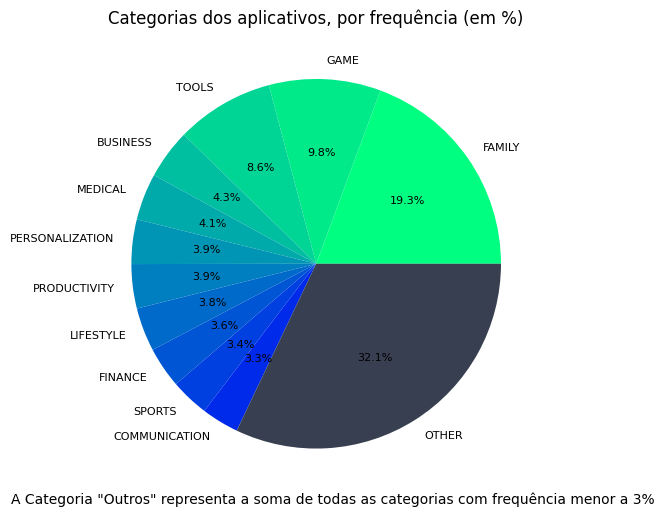

In [128]:
# Carregando a planilha ----------------------------------------

# Todas as células carregam a planilha
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df = pd.read_csv('./googleplaystore.csv')

# Remover linhas duplicadas
df = df.drop_duplicates()

# Convertendo a coluna 'Last Updated' para o formato de data
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Ordenando o DataFrame pela coluna 'Last Updated' em ordem decrescente
df = df.sort_values(by='Last Updated', ascending=False)

# Removendo linhas duplicadas mantendo apenas a mais recente com base na coluna 'App'
df = df.drop_duplicates(subset='App', keep='first')

# ----------------------------------------

# Escolhendo colunas específicas
tabelaCategorias = df[['Category']].copy()

# Contando o número de aplicativos em cada categoria
contagemPorCategoria = tabelaCategorias['Category'].value_counts()

# Separando categorias com menos de 3% em "Outros" ----------

# Separar em porcentagem
porcentagens = contagemPorCategoria / contagemPorCategoria.sum() * 100

# Definir um limite
LIMITE = 3

# Separar os valores maiores que o limite
novaTabelaCategorias = porcentagens[porcentagens > LIMITE].copy()

# Adicionar a soma dos valores restantes (menors que o limite)
novaTabelaCategorias['OTHER'] = porcentagens[porcentagens <= LIMITE].copy().sum()


# Criando o gráfico de pizza -----------------------------------------------------
cmap = plt.get_cmap('winter_r')  # Padrão de cores
norm = mcolors.Normalize(vmin=0, vmax=len(novaTabelaCategorias))

# Gerando as cores
cores = [cmap(norm(i)) for i in range(len(novaTabelaCategorias))]
cores[-1] = '#373F51'  # Cor específica para 'Other' (mais clara)

plt.figure(figsize=(6, 6))
plt.pie(novaTabelaCategorias,
        labels=novaTabelaCategorias.index,
        autopct='%1.1f%%',
        textprops={'fontsize': 8},
        colors=cores)

plt.title('Categorias dos aplicativos, por frequência (em %)', loc='center')

plt.text(-1.65, -1.3, f'A Categoria "Outros" representa a soma de todas as categorias com frequência menor a {LIMITE}%')

# Exibindo o gráfico
plt.show()

## 4 - App mais caro do dataset


In [129]:
# Carregando a planilha ----------------------------------------

# Todas as células carregam a planilha
import pandas as pd

df = pd.read_csv('./googleplaystore.csv')

# Remover linhas duplicadas
df = df.drop_duplicates()

# Convertendo a coluna 'Last Updated' para o formato de data
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Ordenando o DataFrame pela coluna 'Last Updated' em ordem decrescente
df = df.sort_values(by='Last Updated', ascending=False)

# Removendo linhas duplicadas mantendo apenas a mais recente com base na coluna 'App'
df = df.drop_duplicates(subset='App', keep='first')

# ------------------------------------------------------------

# Escolhendo colunas específicas
tabelaAppsPrecos = df[['App', 'Price']].copy()

# Formatando coluna de preço
tabelaAppsPrecos['Price'] = tabelaAppsPrecos['Price'].str.replace('$', '')
tabelaAppsPrecos['Price'] = pd.to_numeric(tabelaAppsPrecos['Price'], errors='coerce')

# Ordenar os apps pelo preço
tabelaAppsPrecos = tabelaAppsPrecos.sort_values(by='Price', ascending=False)

# Selecionar app mais caro
maisCaro = tabelaAppsPrecos.head(1).to_dict(orient='records')[0]
print(
    f'O app mais caro é {maisCaro["App"]}, com o preço de ${maisCaro["Price"]}')

O app mais caro é I'm Rich - Trump Edition, com o preço de $400.0


## 5 - Apps Mature 17+


In [130]:
# Carregando a planilha ----------------------------------------

# Todas as células carregam a planilha
import pandas as pd

df = pd.read_csv('./googleplaystore.csv')

# Remover linhas duplicadas
df = df.drop_duplicates()

# Convertendo a coluna 'Last Updated' para o formato de data
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Ordenando o DataFrame pela coluna 'Last Updated' em ordem decrescente
df = df.sort_values(by='Last Updated', ascending=False)

# Removendo linhas duplicadas mantendo apenas a mais recente com base na coluna 'App'
df = df.drop_duplicates(subset='App', keep='first')

# --------------------------------------------------------------

tabelaRating = df[df['Content Rating'] == 'Mature 17+']

print(f'{len(tabelaRating)} aplicativos possuem a classificação \"Mature 17+\" .')

393 aplicativos possuem a classificação "Mature 17+" .


## 6 - Top 10 apps por número de reviews


In [131]:
# Carregando a planilha ----------------------------------------

# Todas as células carregam a planilha
import pandas as pd

df = pd.read_csv('./googleplaystore.csv')

# Remover linhas duplicadas
df = df.drop_duplicates()

# Convertendo a coluna 'Last Updated' para o formato de data
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Ordenando o DataFrame pela coluna 'Last Updated' em ordem decrescente
df = df.sort_values(by='Last Updated', ascending=False)

# Removendo linhas duplicadas mantendo apenas a mais recente com base na coluna 'App'
df = df.drop_duplicates(subset='App', keep='first')

# --------------------- ----------------------------------------

# Ordenando o DataFrame pela coluna 'Reviews'
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Ordenar pelo número de Reviews
df = df.sort_values(by='Reviews', ascending=False)

# Selecionar os 10 maiores
topApps = df.head(10)

# Remover índice para exibição
blankIndex = [''] * len(topApps)
topApps.index = blankIndex

display(topApps[['App', 'Reviews']])

,App,Reviews
,Facebook,78158306
,WhatsApp Messenger,69119316
,Instagram,66577313
,Messenger – Text and Video Chat for Free,56642847
,Clash of Clans,44881447
,Clean Master- Space Cleaner & Antivirus,42916526
,Subway Surfers,27722264
,YouTube,25655305
,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
,Clash Royale,23125280


## 7 - 2 outros cálculos (lista e valor)


### Top 10 Apps com Rating 5, ordenados pelo número de reviews


In [132]:
# Carregando a planilha ----------------------------------------

import pandas as pd

df = pd.read_csv('./googleplaystore.csv')

# Remover linhas duplicadas
df = df.drop_duplicates()

# Convertendo a coluna 'Last Updated' para o formato de data
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Ordenando o DataFrame pela coluna 'Last Updated' em ordem decrescente
df = df.sort_values(by='Last Updated', ascending=False)

# Removendo linhas duplicadas mantendo apenas a mais recente com base na coluna 'App'
df = df.drop_duplicates(subset='App', keep='first')

# ------------------------------------------------------------

# Ordenando o DataFrame pela coluna 'Rating'
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Selecionando os aplicativos com mais instalações
topApps = df[df['Rating'] == max(df['Rating'])].copy()

# Ordenar pelo número de Reviews
topApps = topApps.sort_values(by='Reviews', ascending=False)

top10Apps = topApps.head(10)

# Rrmover índice para exibição
blankIndex = [''] * len(top10Apps)
top10Apps.index = blankIndex

display(top10Apps[['App', 'Rating', 'Reviews']])

,App,Rating,Reviews
,Ríos de Fe,5.0,141
,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",5.0,104
,Oración CX,5.0,103
,Barisal University App-BU Face,5.0,100
,Master E.K,5.0,90
,CL REPL,5.0,47
,AJ Cam,5.0,44
,CS & IT Interview Questions,5.0,43
,Ek Vote,5.0,43
,AI Today : Artificial Intelligence News & AI 101,5.0,43


### App mais baixado para a versão mais nova do Android


In [133]:
# Carregando a planilha ----------------------------------------

import pandas as pd

df = pd.read_csv('./googleplaystore.csv')

# Remover linhas duplicadas
df = df.drop_duplicates()

# Convertendo a coluna 'Last Updated' para o formato de data
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Ordenando o DataFrame pela coluna 'Last Updated' em ordem decrescente
df = df.sort_values(by='Last Updated', ascending=False)

# Removendo linhas duplicadas mantendo apenas a mais recente com base na coluna 'App'
df = df.drop_duplicates(subset='App', keep='first')

# -------------------------------------------------------------

# Escolhendo colunas específicas
maisBaixados = df[['App', 'Installs', 'Android Ver']].copy()

# Formatando coluna de versão
maisBaixados['Android Ver'] = maisBaixados['Android Ver'].str.replace(
    ' and up', '')
maisBaixados['Android Ver'] = pd.to_numeric(
    maisBaixados['Android Ver'], errors='coerce')

# Selecionar maior versão, ignorando valores 'NaN'
# Nesse caso específico, NaN não nos interessa porque não fará diferença na análise

maiorVersao = max(maisBaixados['Android Ver'],
                  key=lambda x: float(str(x).lower().replace('nan', '0')))

maisBaixados = maisBaixados[maisBaixados['Android Ver'] == maiorVersao]


# Formatando coluna de número de instalações
maisBaixados['Installs'] = maisBaixados['Installs'].str.replace(
    '+', '').str.replace(',', '')
maisBaixados['Installs'] = pd.to_numeric(
    maisBaixados['Installs'], errors='coerce')


# Ordenando pelos aplicativos com mais instalações
maisBaixados = maisBaixados.sort_values(by='Installs', ascending=False)


# Escolhendo app mais baixado e exibindo
appMaisBaixado = maisBaixados.head(1).to_dict(orient='records')[0]
print(
    f'O app mais baixado é {appMaisBaixado["App"]}, com {appMaisBaixado["Installs"]} instalações, a partir da versão {appMaisBaixado["Android Ver"]}')

O app mais baixado é Moto Suggestions ™, com 1000000 instalações, a partir da versão 8.0


## 8 - 2 outras formas gráficas

### Top 10 Gêneros por Nº de Apps - Treemap

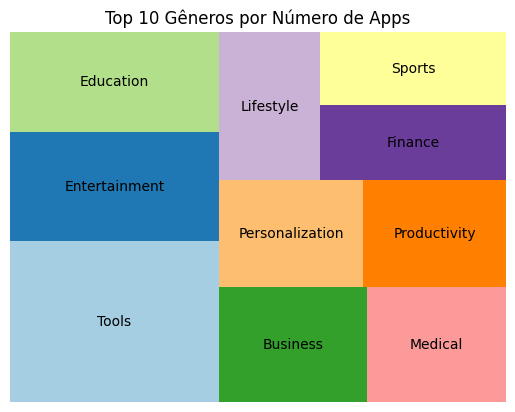

In [134]:
# Carregando a planilha ----------------------------------------

import squarify
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./googleplaystore.csv')

# Remover linhas duplicadas
df = df.drop_duplicates()

# Convertendo a coluna 'Last Updated' para o formato de data
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Ordenando o DataFrame pela coluna 'Last Updated' em ordem decrescente
df = df.sort_values(by='Last Updated', ascending=False)

# Removendo linhas duplicadas mantendo apenas a mais recente com base na coluna 'App'
df = df.drop_duplicates(subset='App', keep='first')

# -----------------------------------------------------------

# Criando uma tabela de Gêneros e suas quantidades
contagemPorGenero = df['Genres'].value_counts().rename_axis('Genres').reset_index(name='Quantity')

# Ordenando pela quantidade e pegando os 10 primeiros
contagemPorGenero = contagemPorGenero.sort_values(by='Quantity', ascending=False)
contagemPorGenero = contagemPorGenero.head(10)

# Criando o Gráfico ----------------------------------------
quantidades = list(contagemPorGenero['Quantity'])
generos = list(contagemPorGenero['Genres'])

# Definindo cores
cmap = plt.get_cmap('Paired')
cores = [cmap(i / len(quantidades)) for i in range(len(quantidades))]


squarify.plot(sizes=quantidades, label=generos, color=cores)
plt.title('Top 10 Gêneros por Número de Apps')

# Remover eixos do gráfico
plt.axis("off")

plt.show()

### Número de Atualizações ao Longo do Tempo - Gráfico de Linhas

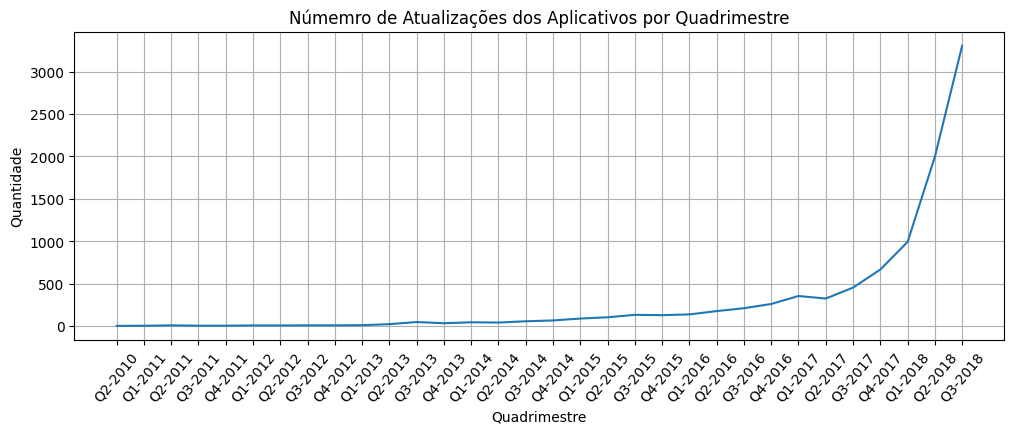

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregando a planilha ----------------------------------------
df = pd.read_csv('./googleplaystore.csv')

# Remover linhas duplicadas
df = df.drop_duplicates()

# Convertendo a coluna 'Last Updated' para o formato de data
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Ordenando o DataFrame pela coluna 'Last Updated' em ordem decrescente
df = df.sort_values(by='Last Updated', ascending=False)

# Removendo linhas duplicadas mantendo apenas a mais recente com base na coluna 'App'
df = df.drop_duplicates(subset='App', keep='first')

# -----------------------------------------------------------------

# Criando um df de Atualizações e suas quantidades agrupadas por quadrimestre
df['YearQuarter'] = df['Last Updated'].dt.to_period('Q')
contagemPorTrimestre = df['YearQuarter'].value_counts().sort_index().rename_axis(
    'YearQuarter').reset_index(name='Quantity')

# Formatar os trimestres como Q{numero}-{Ano}
contagemPorTrimestre['YearQuarter'] = contagemPorTrimestre['YearQuarter'].apply(
    lambda x: f"Q{x.quarter}-{x.year}")

# Criar o Gráfico
plt.figure(figsize=(12, 4))
plt.plot(contagemPorTrimestre['YearQuarter'], contagemPorTrimestre['Quantity'])
plt.xticks(rotation=50)
plt.xlabel('Quadrimestre')
plt.ylabel('Quantidade')
plt.title('Númemro de Atualizações dos Aplicativos por Quadrimestre')
plt.grid(True)
plt.show()